In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Housing2.csv')

In [3]:
print(data.isnull().sum())  # بررسی مقادیر گم‌شده
data = data.dropna()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
label_encoders = {}
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [6]:
X = data.drop('price', axis=1)  # ویژگی‌ها
y = data['price']  # برچسب‌ها

In [7]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [8]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1771751116594.0352
R^2 Score: 0.6494754192267803


In [15]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
Intercept: 293083.06915066857


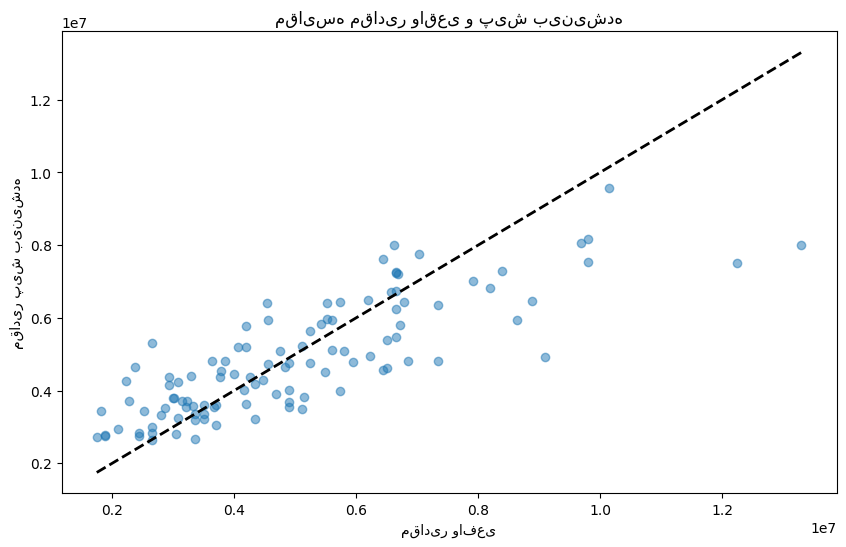

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # خط 45 درجه
plt.xlabel('مقادیر وافعی')
plt.ylabel('مقادیر پیش‌ بینی‌شده')
plt.title('مقایسه مقادیر واقعی و پیش‌ بینی‌شده')
plt.show()

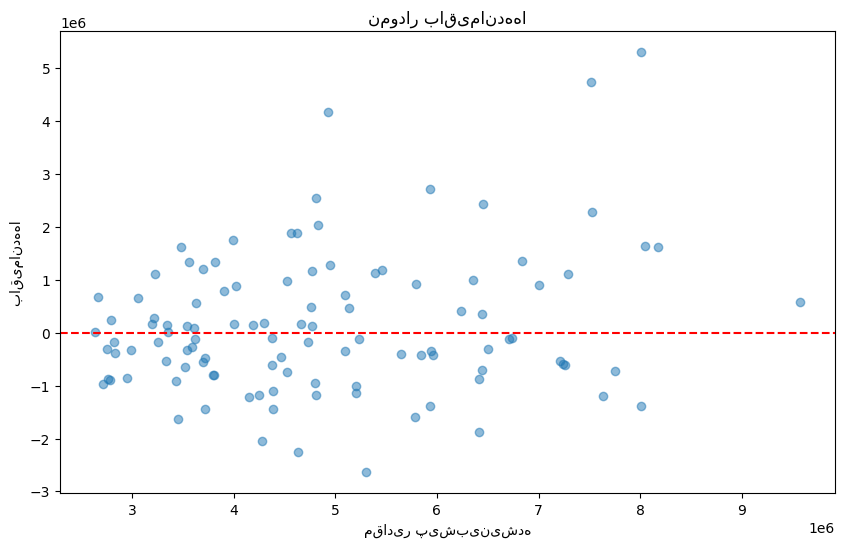

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # خط افقی در y=0
plt.xlabel('مقادیر پیش‌بینی‌شده')
plt.ylabel('باقی‌مانده‌ها')
plt.title('نمودار باقی‌مانده‌ها')
plt.show()

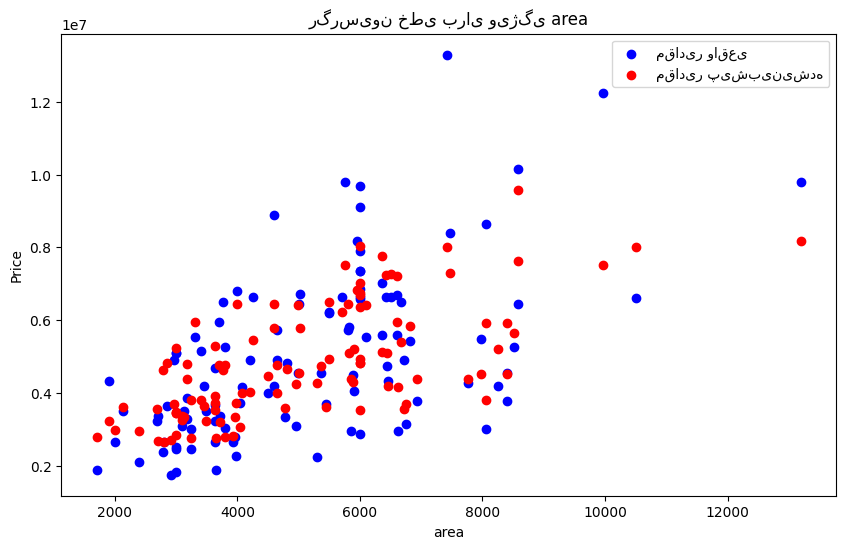

In [19]:
feature = 'area'
plt.figure(figsize=(10, 6))
plt.scatter(X_test[feature], y_test, color='blue', label='مقادیر واقعی')
plt.scatter(X_test[feature], y_pred, color='red', label='مقادیر پیش‌بینی‌شده')
plt.xlabel(feature)
plt.ylabel('Price')
plt.title(f'رگرسیون خطی برای ویژگی {feature}')
plt.legend()
plt.show()